In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./csv/dot.csv")
x_data = np.array(df[['x1','x2']])
y_data = np.array(df['y_c'])
x_train = x_data
y_train = y_data.reshape(-1,1)

Y_c = [['red' if y else 'blue'] for y in y_train]

In [3]:
x_train = tf.cast(x_train,tf.float32)
y_train = tf.cast(y_train,tf.float32)

train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)

In [4]:
w1 = tf.Variable(tf.random.normal([2,11]),dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01,shape=[11]))
w2 = tf.Variable(tf.random.normal([11,1]),dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01,shape=[1]))

In [5]:
lr = 0.005
epoch = 800

In [6]:
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            h1 = tf.matmul(x_train,w1) + b1
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1,w2) + b2
            
            loss_mse = tf.reduce_mean(tf.square(y_train-y))
            # 添加L2正则化
            loss_reqularization = []
            loss_reqularization.append(tf.nn.l2_loss(w1))
            loss_reqularization.append(tf.nn.l2_loss(w2))
            # 求和
            # 例如
            # x = tf.constant(([1,1,1],[1,1,1])) tf.reduce_sum(x) ===> 6
            loss_reqularization = tf.reduce_sum(loss_reqularization)
            loss = loss_mse + 0.03 * loss_reqularization #REGULARIZER = 0.03
        
        # 计算loss对各个参数的梯度 sub减去
        variables = [w1,b1,w2,b2]
        grads = tape.gradient(loss,variables)
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))
        

epoch: 0 loss: 1.2142138481140137
epoch: 20 loss: 0.45756974816322327
epoch: 40 loss: 0.39209434390068054
epoch: 60 loss: 0.35357484221458435
epoch: 80 loss: 0.3250974416732788
epoch: 100 loss: 0.3034583628177643
epoch: 120 loss: 0.2860814929008484
epoch: 140 loss: 0.2704770863056183
epoch: 160 loss: 0.2563450038433075
epoch: 180 loss: 0.2435774803161621
epoch: 200 loss: 0.23149500787258148
epoch: 220 loss: 0.22076517343521118
epoch: 240 loss: 0.2110111564397812
epoch: 260 loss: 0.2018071413040161
epoch: 280 loss: 0.19320321083068848
epoch: 300 loss: 0.18510836362838745
epoch: 320 loss: 0.1775924265384674
epoch: 340 loss: 0.1704978495836258
epoch: 360 loss: 0.16384173929691315
epoch: 380 loss: 0.15769076347351074
epoch: 400 loss: 0.15188224613666534
epoch: 420 loss: 0.14642611145973206
epoch: 440 loss: 0.1413036733865738
epoch: 460 loss: 0.1365128755569458
epoch: 480 loss: 0.13192950189113617
epoch: 500 loss: 0.1276877373456955
epoch: 520 loss: 0.12381482869386673
epoch: 540 loss: 0.12

In [7]:
print("预测部分")
# 生成测试点
xx,yy = np.mgrid[-3:3:.1,-3:3:.1]
grid = np.c_[xx.ravel(),yy.ravel()]
grid = tf.cast(grid,tf.float32)

预测部分


In [8]:
# probs为输出
probs = []
# x_predict 是测试用的点，对x_predict预测输出查看分类
# 注意x_predict的shape和x_train的shape
print(grid[0].shape) # (2,)
print(x_train.shape) # (12,2)
for x_predict in grid:    
    
    # 用x_predict = x_predict.reshape(x_train.shape)
    # 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'reshape'
    # 这里x_predict一开始写的grid、错误
    
    h1 = tf.matmul([x_predict],w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1,w2) + b2
    probs.append(y)

(2,)
(12, 2)


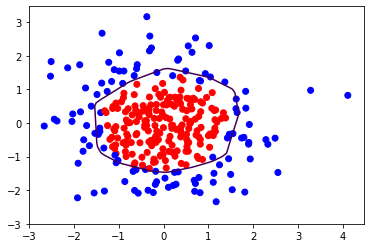

In [9]:
# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]
# probs的shape调整成xx的样子
probs = np.array(probs).reshape(xx.shape)
plt.scatter(x1,x2,color=np.squeeze(Y_c))
# 把坐标xx yy和对应的值probs放入contour函数，给probs值为0.5的所有点上色  plt.show()后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

In [ ]:
# 与没有加正则化的图像相比、这里的曲线更加光滑，有着更好的泛化能力